In [1]:
import pandas as pd

from significance_analysis import conduct_analysis

# Load example dataset
data = pd.read_csv("./example_dataset.csv")

In [35]:
import numpy as np
import matplotlib.pyplot as plt
def algo_simulator(budget:int,workers_power:int,quality:float,noise:float):
    runs=[]
    for i in range((2**workers_power)):
        runs.append([1])
    for i in range(1,budget):
        #print(f"Budget: {budget-i}")
        print(i)
        multiplier=np.floor(budget/i)
        print(multiplier)
        current_workers=multiplier#(2**workers_power)*(multiplier-1)/multiplier
        latest_entries=[]
        for run in runs:
            latest_entries.append(run[-1])
        latest_entries.sort()
        for index,run in enumerate(runs):
            if latest_entries.index(run[-1])<=current_workers:
                new_point=(np.exp(-quality*i)+np.random.normal(size=1,scale=noise))[0]
                runs[index].append(min([run[-1],new_point]))
    return runs

algo_simulator(10,2,2,0.1)

1
10.0
2
5.0
3
3.0
4
2.0
5
2.0
6
1.0
7
1.0
8
1.0
9
1.0


[[1,
  0.10685563910829603,
  -0.053147658423887995,
  -0.053147658423887995,
  -0.10831982905601217,
  -0.10831982905601217,
  -0.10831982905601217,
  -0.10831982905601217,
  -0.11244243682070536,
  -0.11244243682070536],
 [1,
  0.006826970898741208,
  -0.04203114071305512,
  -0.04203114071305512,
  -0.04203114071305512,
  -0.04203114071305512,
  -0.04203114071305512,
  -0.04203114071305512,
  -0.051178361822797676,
  -0.051178361822797676],
 [1, 0.04488042041040097, 0.04488042041040097, 0.04488042041040097],
 [1,
  0.13520196490656775,
  0.012430503346165158,
  0.012430503346165158,
  -0.04061062701744197,
  -0.04061062701744197]]

20.0
20.0
10.0
10.0
6.0
6.0
5.0
5.0
4.0
4.0
3.0
3.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
20
20
11
6
5
4
7
3


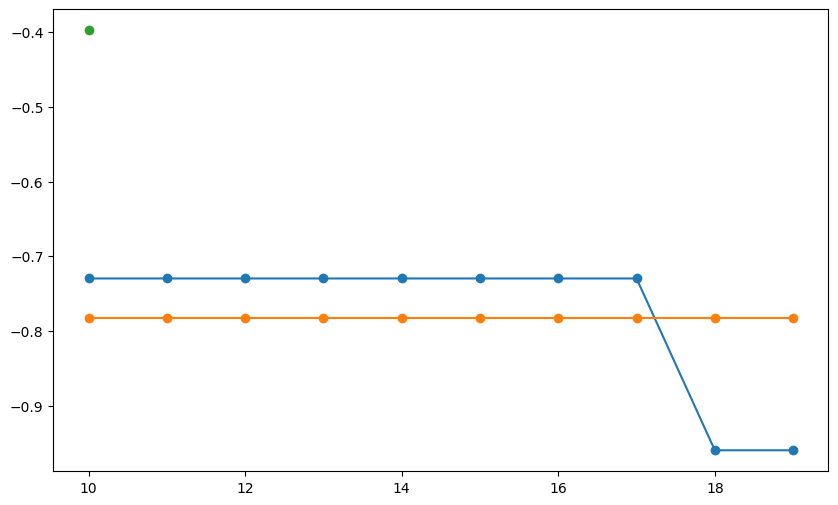

In [31]:
max_budget=20
number_of_splits=10
number_of_workers_power=3
quality=[0.5]#,0.6,2]
noise=0.5

points=list(set(np.round(np.linspace(max_budget,number_of_splits))))
runs=[]
for algo_number in range(len(quality)):
    run=algo_simulator(budget=max_budget,workers_power=number_of_workers_power,quality=quality[algo_number],noise=noise)
    runs+=run

x_data=[]
y_data=[]
for run in runs:
    print(len(run))
    x_data.append([])
    y_data.append([])
    for point in points:
        if len(run)>point:
            x_data[-1].append(run[int(point)])
            y_data[-1].append(point)



_, axis = plt.subplots(figsize=(10, 6))
for number,group in enumerate(x_data):
    axis.errorbar(
        y_data[number],
        group,
        fmt="o-",
        capsize=3,
    )
plt.show()

In [16]:
runs=[[3,2],[3,0.5],[3,3],[4,4]]
import random

#for current_workers in [4,3,2,1]:

budget=4
for current_budget in range(budget):
    

latest_entries=[]
for run in runs:
    latest_entries.append(run[-1])
candidates=latest_entries.copy()
latest_entries.sort()
for index,run in enumerate(runs):
    if latest_entries.index(run[-1])<current_workers#:
        runs[index].append(min([run[-1],random.randint(0,20)/20]))
    else:
        print(f"Run {index} out! {run}")

    print(runs)

[[3, 2, 0.45], [3, 0.5, 0.5], [3, 3, 0.6], [4, 4, 0.25]]
Run 2 out! [3, 3, 0.6]
[[3, 2, 0.45, 0.2], [3, 0.5, 0.5, 0.45], [3, 3, 0.6], [4, 4, 0.25, 0.25]]
Run 1 out! [3, 0.5, 0.5, 0.45]
Run 2 out! [3, 3, 0.6]
[[3, 2, 0.45, 0.2, 0.2], [3, 0.5, 0.5, 0.45], [3, 3, 0.6], [4, 4, 0.25, 0.25, 0.0]]
Run 0 out! [3, 2, 0.45, 0.2, 0.2]
Run 1 out! [3, 0.5, 0.5, 0.45]
Run 2 out! [3, 3, 0.6]
[[3, 2, 0.45, 0.2, 0.2], [3, 0.5, 0.5, 0.45], [3, 3, 0.6], [4, 4, 0.25, 0.25, 0.0, 0.0]]
